# Pyber Noticable trends

### 1.	The city types have a number of trade-offs. In urban areas, trips are more likely to be shorter but happen at a higher frequency.  The opposite happens to rural cities: less rides, and a higher fare per ride. Suburban cities are between these trends with lower ride count and higher fare average.

### 2.	Urban drivers have more competition from other drivers competing for a fare. This translates in a smoother function of drivers to fares calculations. Rural / suburban drivers don’t have this kind of competition an thus can rely on a more regular portion of the company's total rides. This means that these drivers have a higher chance to obtain more individual fares. The choice is between the higher number of fares in the urban areas getting lower fare averages or lower number of fares in rural and suburban with higher fares per ride.

### 3.	However, the urban areas included in this data set are closer than the other two city types. This means that drivers may also consider the possibility of switching urban areas they find their riders. The data seems to suggest they would not do any better from changing which Urban city they find their riders. Driving outside an Urban city and moving to the Suburbs doesn't necessarily mean a higher wage for the driver however because there is a larger spread in Suburban  areas for total rides and the rides themselves are a greater length, it can be a good bet that it might be.

In [7]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [8]:
# Read CSV files
city_data = pd.read_csv("city_data.csv")
ride_data = pd.read_csv("ride_data.csv")

In [9]:
# Drop any duplicate values
city_data = city_data.drop_duplicates('city')
# Check city data
city_data.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [10]:
# Check ride data
ride_data.head()

,city,date,fare,ride_id
0,Sarabury,1/16/2016 13:49,38.35,5.403690e+12
1,South Roy,1/2/2016 18:42,17.49,4.036270e+12
2,Wiseborough,1/21/2016 17:35,44.18,3.645040e+12
3,Spencertown,7/31/2016 14:53,6.87,2.242600e+12
4,Nguyenbury,7/9/2016 4:42,6.28,1.543060e+12


In [12]:
# combine both data sets
pyber_data = city_data.merge(ride_data, on = 'city', how = 'inner')
pyber_data.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,8/19/2016 4:27,5.51,6.246010e+12
1,Kelseyland,63,Urban,4/17/2016 6:59,5.54,7.466470e+12
2,Kelseyland,63,Urban,5/4/2016 15:06,30.54,2.140500e+12
3,Kelseyland,63,Urban,1/25/2016 20:44,12.08,1.896990e+12
4,Kelseyland,63,Urban,8/9/2016 18:19,17.91,8.784210e+12


In [13]:
grouped = pyber_data.groupby("city")
grouped.count().head()

,driver_count,type,date,fare,ride_id
city,,,,,
Alvarezhaven,31,31,31,31,31
Alyssaberg,26,26,26,26,26
Anitamouth,9,9,9,9,9
Antoniomouth,22,22,22,22,22
Aprilchester,19,19,19,19,19


# Bubble Plot of Ride Sharing Data

In [14]:
# Create separate data frames based on city types - Urban, Suburban and Rural
urban_city = pyber_data.loc[(pyber_data["type"] == "Urban")]
suburban_city = pyber_data.loc[(pyber_data["type"] == "Suburban")]
rural_city = pyber_data.loc[(pyber_data["type"] == "Rural")]

In [15]:
# Per city calculations of Average Fare, Total Rides and Total Drivers for Urban cities
avg_fare_urban_city = urban_city.groupby(['city'])['fare'].mean()
total_rides_urban_city = urban_city.groupby(['city']).count()['ride_id']
total_drivers_urban_city = urban_city.groupby(['city'])['driver_count'].value_counts()

# Per city calculations of Average Fare, Total Rides and Total Drivers for Suburban cities
avg_fare_suburban_city = suburban_city.groupby(['city'])['fare'].mean()
total_rides_suburban_city = suburban_city.groupby(['city']).count()['ride_id']
total_drivers_suburban_city = suburban_city.groupby(['city'])['driver_count'].value_counts()

# Per city calculations of Average Fare, Total Rides and Total Drivers for Rural cities
avg_fare_rural_city = rural_city.groupby(['city'])['fare'].mean()
total_rides_rural_city = rural_city.groupby(['city']).count()['ride_id']
total_drivers_rural_city = rural_city.groupby(['city'])['driver_count'].value_counts()

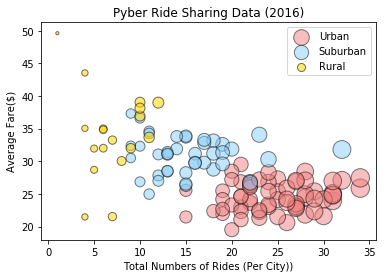

In [16]:
# Create scatter plots for Urban, Suburban and Rural cities
plt.scatter(total_rides_urban_city, avg_fare_urban_city,s=total_drivers_urban_city*10,
            marker ='o', facecolors ="lightcoral", edgecolors='black',alpha = 0.5, label="Urban")

plt.scatter(total_rides_suburban_city, avg_fare_suburban_city,s=total_drivers_suburban_city*10,
            marker ='o', facecolors ="lightskyblue", edgecolors='black',alpha = 0.5, label="Suburban")

plt.scatter(total_rides_rural_city, avg_fare_rural_city,s=total_drivers_rural_city*10,
            marker ='o', facecolors ="gold", edgecolors='black',alpha = 0.55, label="Rural")
# Chart title
plt.title("Pyber Ride Sharing Data (2016)")
# x label
plt.xlabel("Total Numbers of Rides (Per City))")
# y label
plt.ylabel("Average Fare($)")
# legend 
plt.legend(loc='upper right')
# Save an image of the chart and print to screen
#plt.savefig("Images/Pyber Ride Sharing.png")
plt.show()

### Total Fares by City Type

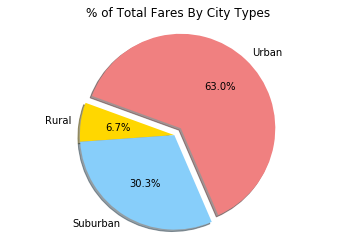

In [17]:
# Calculate Total Fare by City Type
total_fare = pyber_data.groupby(['type'])['fare'].sum()
# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]
# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Fares By City Types")
plt.pie(total_fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=160)
plt.axis("equal")
#plt.savefig("Images/% of Total Fares By City Types.png")
plt.show()

### Total Rides by City Type

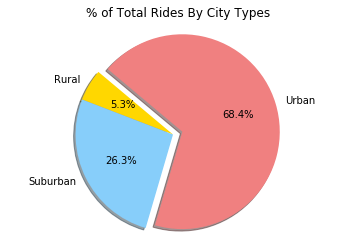

In [18]:
# Calculate Total Fare by City Type
total_rides = pyber_data.groupby(['type'])['ride_id'].count()
# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]
# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Rides By City Types")
plt.pie(total_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
#plt.savefig("Images/% of Total Rides By City Types.png")
plt.show()

### Drivers by City Type

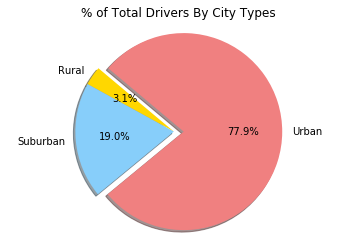

In [19]:
# Calculate Total Drivers by City Type
total_drivers = city_data.groupby(['type'])['driver_count'].sum()
# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]
# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Drivers By City Types")
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
#plt.savefig("Images/% of Total Drivers By City Types.png")
plt.show()